2-2
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

鋸齒信號的波形從-1線性上升到1，然後下降到-1並重複。看http://en.wikipedia.org/wiki/Sawtooth_wave
編寫一個名為SawtoothSignal的類，該類擴展Signal並提供評估以評估鋸齒信號。
計算鋸齒波的頻譜。諧波結構與三角波和方波相比如何？

cycle是從開始時間到現在有幾個循環。
np.modf會把cycle的小數部份放在fra，整數部份則會忽略。
unbias 移動波形往下，所以讓它的中心在 0。接下來則是正規化，讓它可以符合給定的振幅 amp。

In [1]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

鋸齒波的頻譜

In [2]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

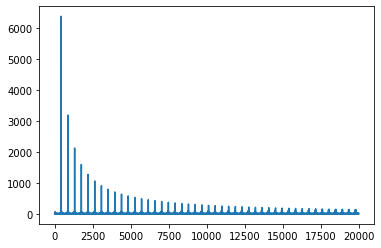

In [3]:
sawtooth.make_spectrum().plot()

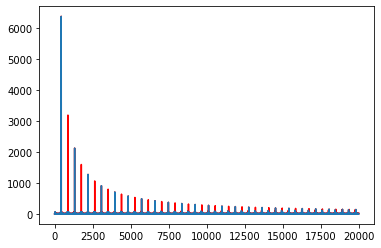

In [4]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

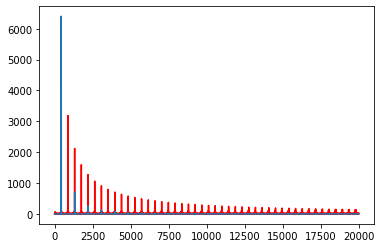

In [5]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='red')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()